In [21]:
#Importing Necessary libraries for loading and plotting data
import pandas as pd   #pandas help in loading the csv and other format into a dataframe
import matplotlib.pyplot as plt #matplotlib is used for plotting the visualisation
import seaborn as sns #seaborn is another visualization library
import numpy as np  #Numpy is used for mathematical operations
from scipy.stats import skew, kurtosis #These functions from scip are used to calculate skewness and kurtosis 


In [2]:
#Loading the data into a dataframe by reading the csv file
data = pd.read_csv('Twitter_Stock_Market_Dataset.csv')
data.head(10) #shows top 10 data entry in the csv file

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0
5,2013-11-14,42.340000,45.669998,42.240002,44.689999,44.689999,11099433.0
6,2013-11-15,45.250000,45.270000,43.430000,43.980000,43.980000,8010663.0
7,2013-11-18,43.500000,43.950001,40.849998,41.139999,41.139999,12810624.0
8,2013-11-19,41.389999,41.900002,40.000000,41.750000,41.750000,7436616.0
9,2013-11-20,41.400002,41.750000,40.509998,41.049999,41.049999,5767325.0


In [2]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.shape

(284807, 31)

In [3]:
def calculate_skewness_kurtosis(data, column_name):
    """
    Calculates and prints the skewness and kurtosis for a specified column in the given DataFrame.

    Parameters:
    - data: DataFrame containing the data.
    - column_name: String, the name of the column for which skewness and kurtosis are to be calculated.

    Skewness measures the asymmetry of the probability distribution of a real-valued random variable about its mean. 
    Positive skewness indicates a distribution with an asymmetric tail extending toward more positive values.
    
    Kurtosis measures the "tailedness" of the probability distribution. A higher kurtosis indicates a distribution with heavier tails, 
    and a lower kurtosis indicates a distribution with lighter tails.
    """
    skewness = data[column_name].skew()
    kurtosis = data[column_name].kurtosis()

    print(f"Skewness for {column_name}:", skewness)
    print(f"Kurtosis for {column_name}:", kurtosis)


In [4]:
calculate_skewness_kurtosis(data,'High')

Skewness for High: 0.46183871510615776
Kurtosis for High: -0.27368458138128116


In [7]:
def plot_heatmap(data):
    # Convert the 'Date' column to datetime format and set it as the index
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    
    # Calculate the correlation matrix
    corr_matrix = data.corr()
    
    # Create the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()
    return

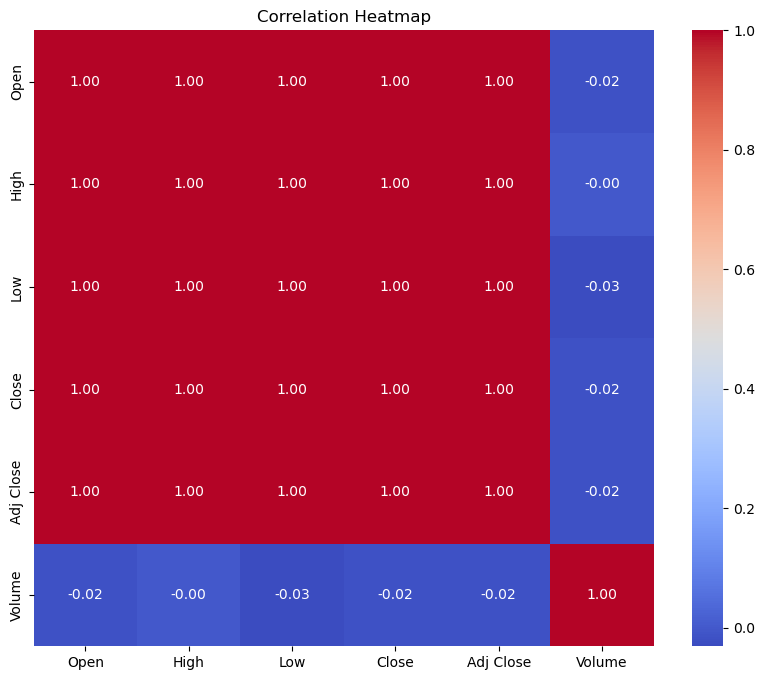

In [8]:
plot_heatmap(data)

# Relational Graph Function

In [11]:
def scatter_plot_open_high(data):
    # Extract 'Open' and 'High' columns from the dataset
    open_prices = data['Open']
    high_prices = data['High']
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(open_prices, high_prices, color='blue', alpha=0.6)
    
    # Add labels and title
    plt.title('Relationship between Open and High Prices')
    plt.xlabel('Open Price')
    plt.ylabel('High Price')
    plt.grid(True)
    
    # Show plot
    plt.show()
    return

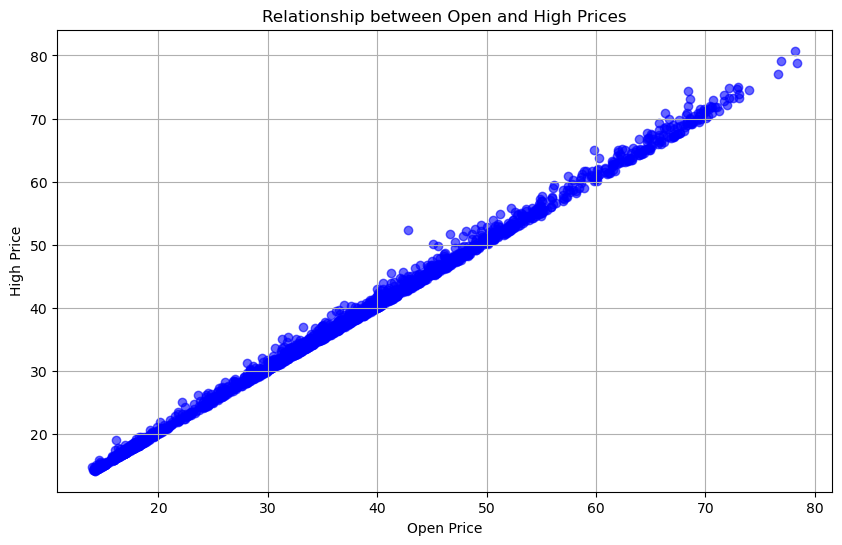

In [12]:
scatter_plot_open_high(data)

#           Categorical Graph Function

In [28]:
def count_plot_volume(data):
    # Set the plot style
    sns.set(style="whitegrid")

    # Create the count plot
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Volume', data=data, palette='muted')
    
    # Add labels and title
    plt.title('Distribution of Volume')
    plt.xlabel('Volume')
    plt.ylabel('Count')
    
    # Rotate x-axis labels for better readability (optional)
    plt.xticks(rotation=45)
    
    # Show plot
    plt.show()
    return

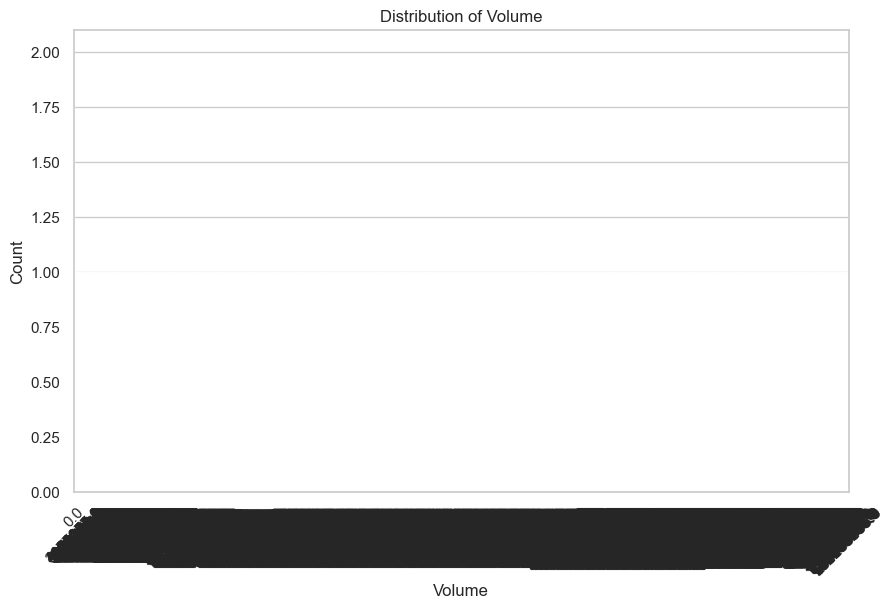

In [29]:
count_plot_volume(data)

# Statistical Graph Function

In [31]:
def box_plot_close_by_volume(data):
    # Set the plot style
    sns.set(style="whitegrid")

    # Create the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Volume', y='Close', data=data)
    
    # Add labels and title
    plt.title('Distribution of Close Prices Across Different Volume Levels')
    plt.xlabel('Volume')
    plt.ylabel('Close Price')
    
    # Rotate x-axis labels for better readability (optional)
    plt.xticks(rotation=45)
    
    # Show plot
    plt.show()
    return

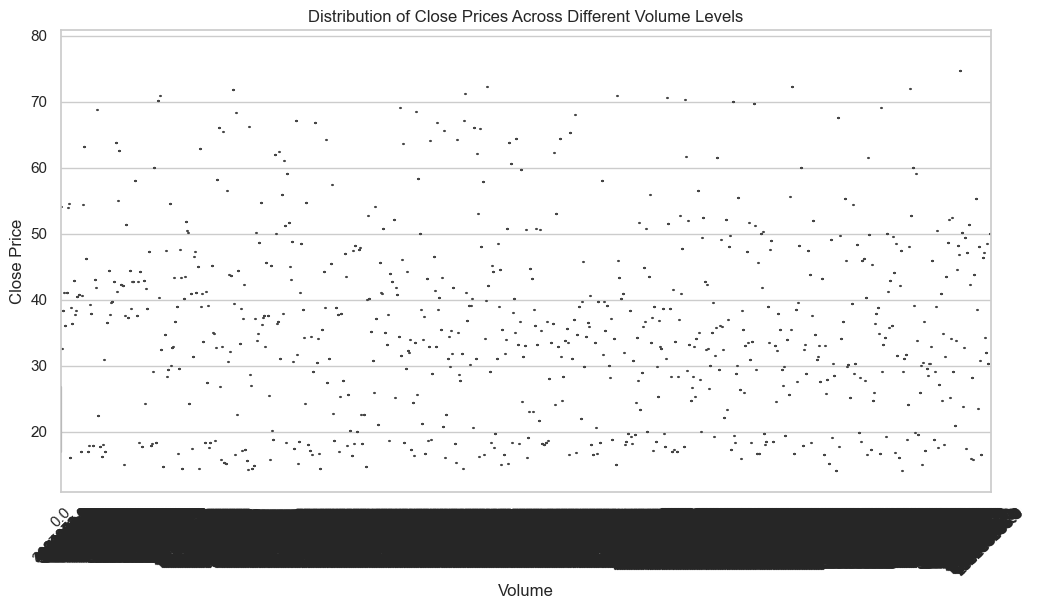

In [30]:
box_plot_close_by_volume(data)

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer


def kmeans_clustering(data, features, n_clusters=3):
    # Select the features for clustering
    X = data[features]
    
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_imputed)
    
    # Add cluster labels to the dataset
    data['Cluster'] = kmeans.labels_
    
    # Print the cluster centers (centroids)
    print("Cluster Centers:")
    print(kmeans.cluster_centers_)
    
    # Visualize the clusters (optional)
    if len(features) == 3:  # 3D plot for 3 features
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        ax.scatter(X_imputed[:, 0], X_imputed[:, 1], X_imputed[:, 2], c=kmeans.labels_, cmap='viridis', s=50)
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
                   marker='x', s=200, c='red', label='Centroids')
        
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])
        ax.set_zlabel(features[2])
        
        plt.title('K-Means Clustering of Stock Prices')
        plt.legend()
        plt.show()
    else:
        print("Visualization supports only 3 features (3D plot)")

    return

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
[[57.48175162 58.53494393 56.34312634]
 [36.83257084 37.52607355 36.15526036]
 [19.30812904 19.69723533 18.94498753]]


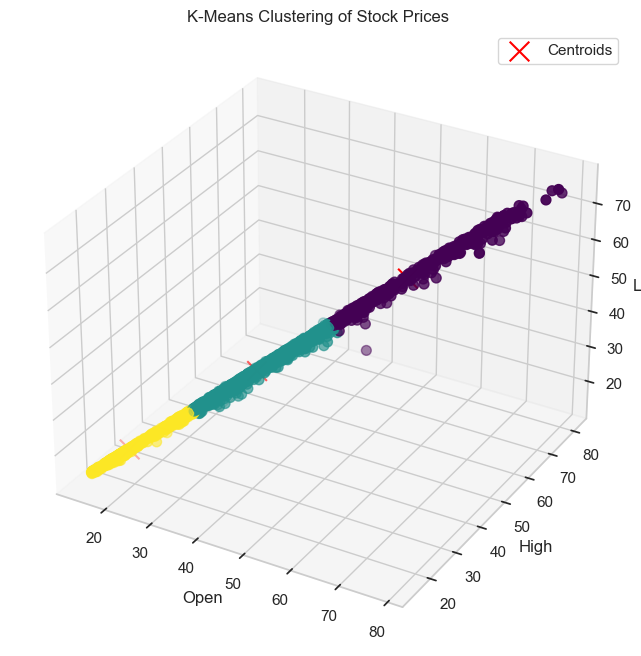

In [40]:
features_to_cluster = ['Open', 'High', 'Low']  # Select features for clustering
kmeans_clustering(data, features_to_cluster)